# 1. Importing Libraries

In [138]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# 2. Loading the Dataset

In [139]:
data = pd.read_csv(r'C:\Users\Lapotop Land\Downloads\email_dataset.csv')

In [140]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


### Dropping unnecessary columns

In [141]:
data = data.drop(columns=['Unnamed: 0', 'label_num'], axis=1)

# 3. Extracting Spam Emails

In [142]:
spam_emails = data[data['label'] == 'spam']

In [143]:
spam_emails

,label,text
3,spam,"Subject: photoshop , windows , office . cheap ..."
7,spam,Subject: looking for medication ? we ` re the ...
10,spam,Subject: vocable % rnd - word asceticism\r\nvc...
11,spam,Subject: report 01405 !\r\nwffur attion brom e...
13,spam,Subject: vic . odin n ^ ow\r\nberne hotbox car...
...,...,...
5159,spam,Subject: pictures\r\nstreamlined denizen ajar ...
5161,spam,Subject: penny stocks are about timing\r\nnoma...
5162,spam,Subject: anomaly boys from 3881\r\nuosda apapr...
5164,spam,Subject: slutty milf wants to meet you\r\ntake...


# 4. Cleaning the Text in Spam Emails

### Words to remove

In [144]:
words_to_remove = ['subject']

### Converting to lowercase

In [145]:
spam_emails = spam_emails['text'].str.lower()

### Removing numbers

In [146]:
spam_emails = spam_emails.str.replace(r'\d+', '', regex=True)

### Removing Special Characters

In [147]:
spam_emails = spam_emails.str.replace(r'\W+', ' ', regex=True)

### Tokenizing (split into individual words)

In [148]:
spam_emails = spam_emails.str.split()

### Removing stopwords

In [149]:
stop_words = set(stopwords.words('english'))
spam_emails = spam_emails.apply(lambda x: [word for word in x if word not in stop_words and word not in words_to_remove])

### Joining words back into a single string for each email

In [150]:
spam_emails = spam_emails.apply(lambda x: ' '.join(x))

### Showing the cleaned text

In [151]:
print(spam_emails.head())

3     photoshop windows office cheap main trending a...
7     looking medication best source difficult make ...
10    vocable rnd word asceticism vcsc brand new sto...
11    report wffur attion brom est inst siupied pgst...
13    vic odin n ow berne hotbox carnal bride cutwor...
Name: text, dtype: object


# 5. Applying Bag of Words (BoW) 

### Initializing the CountVectorizer

In [152]:
vectorizer = CountVectorizer()

### Fitting the Vectorizer and Transforming the Text into a BoW Matrix

In [153]:
X = vectorizer.fit_transform(spam_emails)

In [154]:
print(X)

  (0, 25183)	1
  (0, 35629)	1
  (0, 23587)	1
  (0, 6121)	1
  (0, 20682)	1
  (0, 33262)	1
  (0, 28)	1
  (0, 8785)	1
  (0, 26516)	1
  (0, 13578)	1
  (0, 33863)	1
  (0, 19890)	1
  (0, 6081)	1
  (0, 24041)	1
  (0, 32134)	1
  (0, 27245)	1
  (0, 688)	1
  (0, 25756)	1
  (0, 8574)	1
  (0, 17950)	1
  (0, 24534)	1
  (0, 3911)	1
  (0, 6278)	1
  (0, 28466)	1
  (0, 9651)	1
  :	:
  (1498, 34044)	1
  (1498, 13073)	1
  (1498, 34366)	1
  (1498, 27531)	4
  (1498, 7147)	1
  (1498, 16355)	1
  (1498, 18006)	1
  (1498, 31762)	1
  (1498, 28867)	1
  (1498, 21325)	1
  (1498, 7183)	2
  (1498, 1818)	1
  (1498, 16813)	1
  (1498, 23168)	1
  (1498, 23126)	1
  (1498, 27870)	1
  (1498, 7456)	1
  (1498, 12574)	1
  (1498, 13684)	1
  (1498, 6528)	3
  (1498, 7353)	1
  (1498, 17627)	1
  (1498, 17571)	1
  (1498, 17717)	1
  (1498, 6090)	1


# 6. Analyzing Word Frequency

### Converting the BoW matrix into a DataFrame

In [155]:
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [156]:
bow_df

,aa,aaa,aaas,aabvmmq,aac,aaer,aafco,aaiabe,aaigrcrb,aaihmqv,...,zynsdirnh,zynve,zyqtaqlt,zyrtec,zyyqywp,zzezrjok,zzo,zzocb,zzso,zzsyt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Sum the Word Frequencies

In [157]:
word_freq = bow_df.sum(axis=0)

In [158]:
word_freq

aa          18
aaa          1
aaas         1
aabvmmq      1
aac          2
            ..
zzezrjok     1
zzo          1
zzocb        1
zzso         1
zzsyt        1
Length: 37086, dtype: int64

### Creating a DataFrame from the Word Frequencies

In [159]:
word_freq_df = pd.DataFrame(word_freq, columns=['Frequency'])

### Sorting the DataFrame 

In [160]:
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

In [161]:
word_freq_df = word_freq_df.reset_index().rename(columns={'index': 'Words'})

In [162]:
word_freq_df

,Words,Frequency
0,com,992
1,http,983
2,company,728
3,www,587
4,information,520
...,...,...
37081,impendent,1
37082,impelled,1
37083,impel,1
37084,impediment,1


### Displaying the top 30 most Frequent Words

In [163]:
word_freq_df.head(30)

,Words,Frequency
0,com,992
1,http,983
2,company,728
3,www,587
4,information,520
5,font,515
6,td,504
7,get,485
8,please,483
9,statements,476


# 7. Plotting

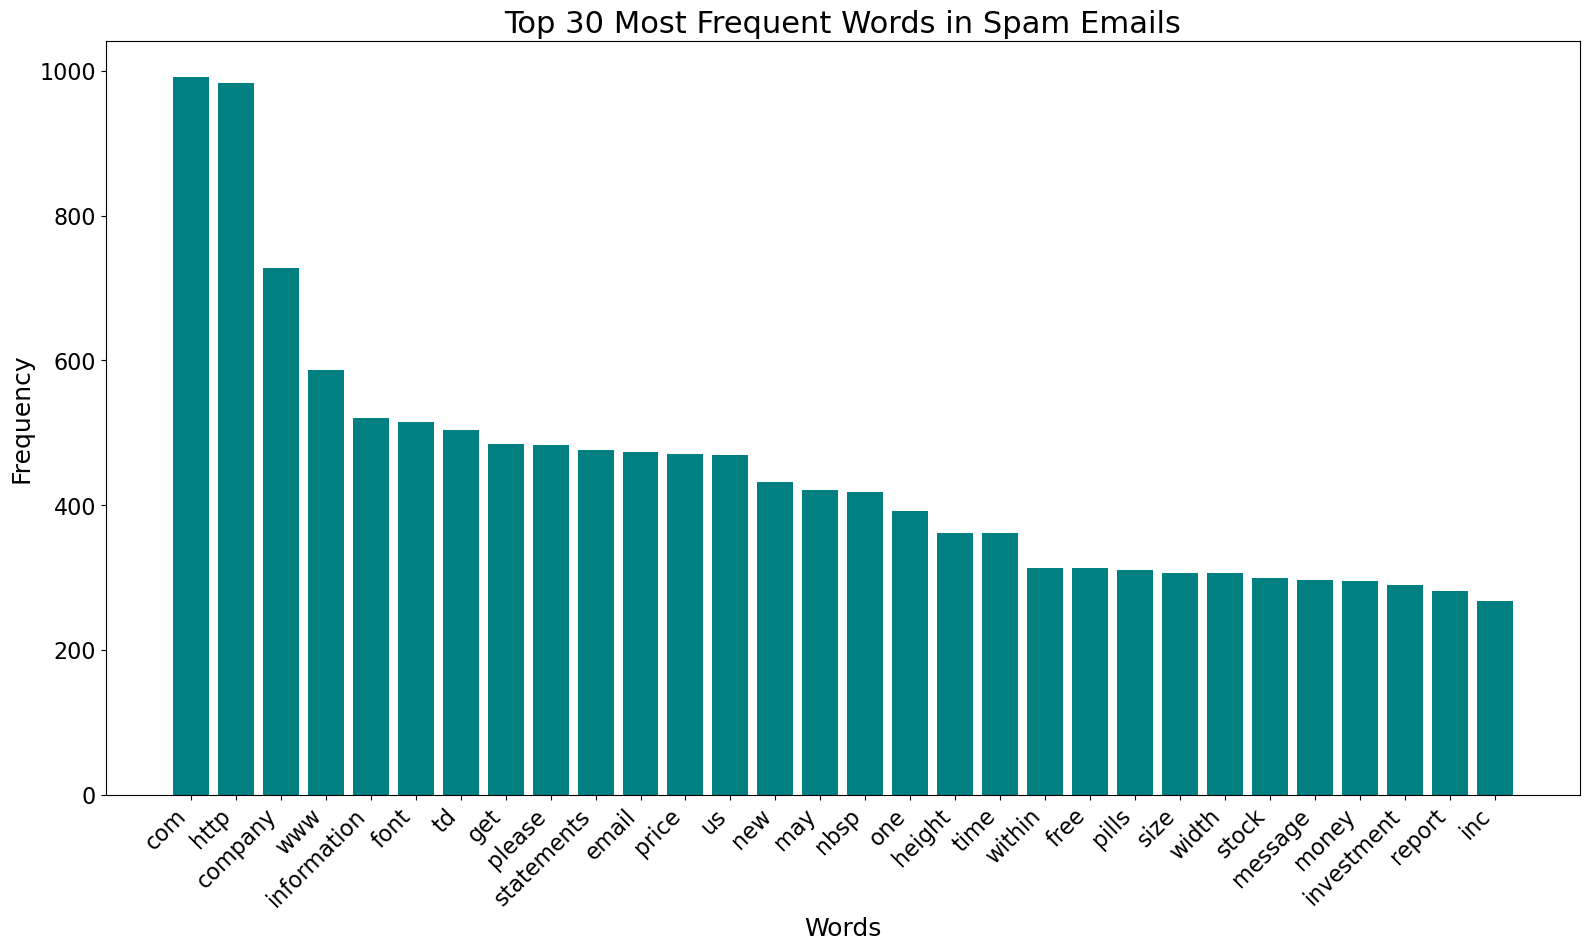

In [164]:
# Setting a figure size
plt.figure(figsize=(16, 10))

# Plotting the top 30 most frequent words
plt.bar(word_freq_df['Words'].head(30), word_freq_df['Frequency'].head(30), color='Teal', width=0.8)

# Customizing title and labels
plt.title('Top 30 Most Frequent Words in Spam Emails', fontsize=22)
plt.xlabel('Words', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

# Rotating the x-axis labels and adjusting alignment
plt.xticks(rotation=45, ha='right', fontsize=16)

# Increasing the size of y-axis (frequency) numbers
plt.yticks(fontsize=16)  

# Adjusting layout for better spacing between plot and labels
plt.tight_layout()

# Adding extra space between the plot and x-axis labels
plt.subplots_adjust(bottom=0.2)

# Showing the plot
plt.show()